In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix


In [2]:
df = pd.read_csv("processed.cleveland.data", header=None)


In [3]:
df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df.columns = [
    "age",
    "sex",
    "cp",
    "restbp",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hd",
]

df.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.dtypes


age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [6]:
df["ca"].unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [7]:
df["thal"].unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [8]:
len(df.loc[(df["ca"] == "?") | (df["thal"] == "?")])


6

In [9]:
df.loc[(df["ca"] == "?") | (df["thal"] == "?")]


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [10]:
len(df)


303

In [11]:
df_clean = df.loc[(df["ca"] != "?") & (df["thal"] != "?")]


In [12]:
len(df_clean)


297

In [13]:
df_clean["ca"].unique()


array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [14]:
df_clean["thal"].unique()


array(['6.0', '3.0', '7.0'], dtype=object)

In [15]:
X = df_clean.iloc[:, :-1]
X.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [16]:
y = df_clean.iloc[:, [-1]]
y.head()


,hd
0,0
1,2
2,1
3,0
4,0


In [17]:
for col in df_clean.columns:
    if len(df_clean[col].unique()) not in [1, 2]:
        print(col)


age
cp
restbp
chol
restecg
thalach
oldpeak
slope
ca
thal
hd


In [18]:
X_ohe = pd.get_dummies(X, columns=["cp", "restecg", "slope", "thal"])
X_ohe.head()


,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [19]:
y.loc[y["hd"] > 0, "hd"] = 1
y["hd"].unique()


/var/folders/9t/1591ynh12mb11ddqfryb4ck00000gn/T/ipykernel_5853/2999270005.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.loc[y["hd"] > 0, "hd"] = 1


array([0, 1])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, train_size=0.7)

clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)


DecisionTreeClassifier()

[Text(0.4875, 0.9444444444444444, 'thal_3.0 <= 0.5\ngini = 0.496\nsamples = 207\nvalue = [113, 94]\nclass = No HD'),
 Text(0.21875, 0.8333333333333334, 'ca <= 0.5\ngini = 0.367\nsamples = 91\nvalue = [22, 69]\nclass = Yes HD'),
 Text(0.1375, 0.7222222222222222, 'thal_6.0 <= 0.5\ngini = 0.492\nsamples = 39\nvalue = [17, 22]\nclass = Yes HD'),
 Text(0.1125, 0.6111111111111112, 'thalach <= 144.5\ngini = 0.444\nsamples = 33\nvalue = [11, 22]\nclass = Yes HD'),
 Text(0.05, 0.5, 'oldpeak <= 0.15\ngini = 0.124\nsamples = 15\nvalue = [1, 14]\nclass = Yes HD'),
 Text(0.025, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No HD'),
 Text(0.075, 0.3888888888888889, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = Yes HD'),
 Text(0.175, 0.5, 'chol <= 272.0\ngini = 0.494\nsamples = 18\nvalue = [10, 8]\nclass = No HD'),
 Text(0.125, 0.3888888888888889, 'slope_1.0 <= 0.5\ngini = 0.426\nsamples = 13\nvalue = [9, 4]\nclass = No HD'),
 Text(0.1, 0.2777777777777778, 'chol <= 235.5

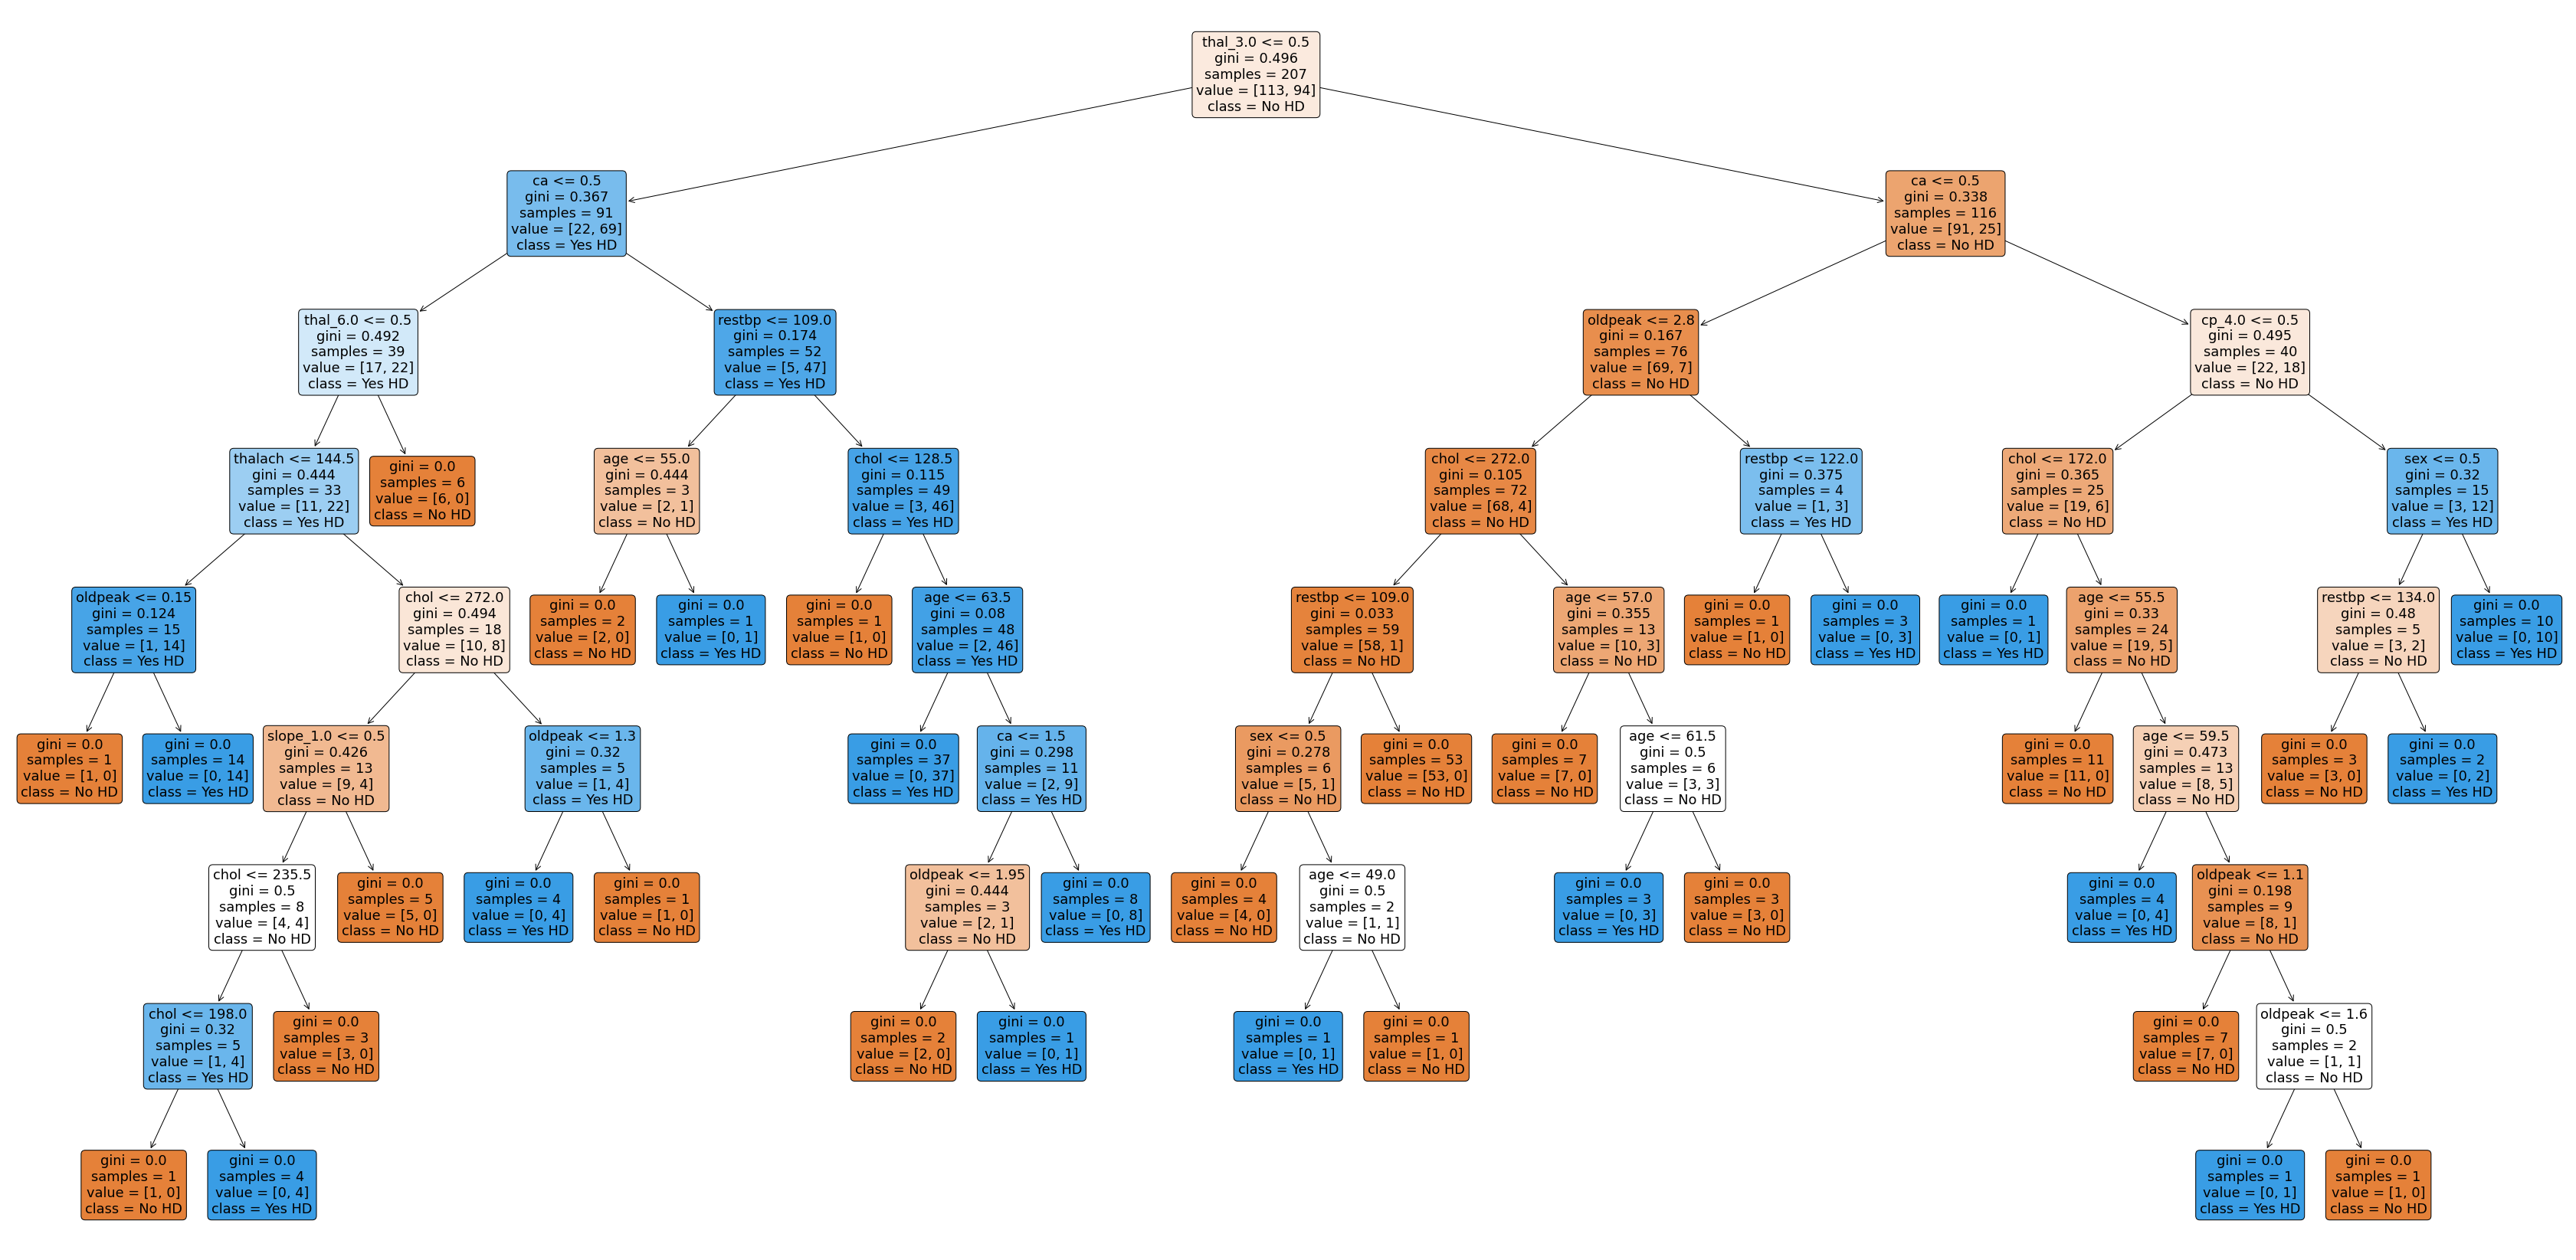

In [21]:
plt.figure(figsize=(60, 30))
plot_tree(
    clf_dt,
    filled=True,
    rounded=True,
    class_names=["No HD", "Yes HD"],
    feature_names=X_ohe.columns,
)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


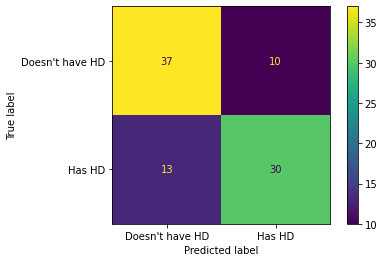

In [22]:
plot_confusion_matrix(
    clf_dt, X_test, y_test, display_labels=["Doesn't have HD", "Has HD"]
)
